# readme
descrip: plot sfc vel (V0) in Gulf of Maine and Gulf of Mexico for historic and future time periods <br>

update history: <br>
v1.0 DL 2021Feb06 <br>
v1.1 DL 2021Mar03 <br>
v1.2 DL 2021Apr24 <br>
v1.3 DL 2021May06 make publication-ready pics <br>
v1.4 DL 2021May20 combine TR run results into one fig (for main text) and control run results into one fig (support info) <br>
v1.5 DL 2021Jun02 pivot to CESM-HR special volume paper, use TR minus CN to account for the model drift <br>
 
extra notes: <br>
Fig 3 of the CESM-HR specital volume paper <br>

# import modules

In [1]:
# general python packages
import numpy as np
# from scipy import stats
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
%matplotlib inline
import proplot as plot
import cartopy
# import cartopy.crs as ccrs
cartopy.config['pre_existing_data_dir']='/ihesp/shared/cartopy_features'
# from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
# import xoak
# import xesmf as xe

# dask jupyter lab packages
from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

# incorporate dask 

In [2]:
client = Client("tcp://10.73.3.229:44249")
client

Client Scheduler: tcp://10.73.3.229:44249 Dashboard: http://10.73.3.229:8787/status,Cluster Workers: 10 Cores: 10 Memory: 210.00 GB


# define parameters

In [3]:
# === North Atlantic ===
# lat, lon ranges and nlat, nlon ranges for t12 and g16 grids, nlat and nlon ranges are slightly larger than lat and lon ranges. 
# lon1, lon2 = -100, -45
# lat1, lat2 = 10, 60
nlon1_NA_t12, nlon2_NA_t12 = 50, 800
nlat1_NA_t12, nlat2_NA_t12 = 1200, 2100

nlon1_NA_g16, nlon2_NA_g16 = 260, 321
nlat1_NA_g16, nlat2_NA_g16 = 200, 370
# ======================


chunks_HR = {'nlat':400,'nlon':300}
chunks_LR = {'nlat':384,'nlon':320}

# === GMa: Gulf of Maine ===
lat1_GMa, lat2_GMa = 35, 55
lon1_GMa, lon2_GMa = -75, -50 
# ==========================

# === GMe: Gulf of Mexico ===
lat1_GMe, lat2_GMe = 15, 32
lon1_GMe, lon2_GMe = -100, -75 
# ===========================

# === POP grids files ===
infile_g16 = ('/ihesp/user/dapengli/Projects4iHESP/'
'SupplementaryFiles4POP/POPgrids_gx1v6_2020Jun29.nc') # POP g16 grid file
infile_t12 = ('/ihesp/user/dapengli/Projects4iHESP/'
'SupplementaryFiles4POP/POPgrids_tx0.1v2_2020Jun29.nc') # POP t12 grid file
# =======================

outdir = '/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/pics/'
pic1 = outdir + 'SfcVelHistFutureGulfMaine_2021Jul02.png'
pic2 = outdir + 'SfcVelHistFutureGulfMexico_2021Jul02.png'

# read data files

read vel files

In [4]:
#TH: transient HR
infile1_vel_TH = ('/scratch/user/dapengli/Projects4iHESP/'
    'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/'
    'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.1979-2020_UVVEL_2021Apr29/'              
    'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.1979-2020_UVVEL_2021Jul02.nc')

infile2_vel_TH = ('/scratch/user/dapengli/Projects4iHESP/'
    'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/'
    'B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF/'
    'B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF.pop.h.2081-2100_UVVEL_2021Jul02.nc')

#CH: control HR
infile1_vel_CH = ('/scratch/user/dapengli/Projects4iHESP/'
    'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/'
    'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway/'
    'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0401-0420_2021Jul02.nc')

infile2_vel_CH = ('/scratch/user/dapengli/Projects4iHESP/'
    'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/'
    'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway/'
    'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0481-0500_2021Jul02.nc')

infile0_TH = ('/ihesp/archive/B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway/'
              'ocn/monthly/B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.1850-01.nc')

ds1_vel_TH=xr.open_dataset(infile1_vel_TH, chunks=chunks_HR)
ds2_vel_TH=xr.open_dataset(infile2_vel_TH, chunks=chunks_HR)
ds1_vel_CH=xr.open_dataset(infile1_vel_CH, chunks=chunks_HR)
ds2_vel_CH=xr.open_dataset(infile2_vel_CH, chunks=chunks_HR)
ds0_TH = xr.open_dataset(infile0_TH, chunks=chunks_HR)
ds1_vel_TH

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 2400, nlon: 3600, time: 42, z_t: 14)
Coordinates:
  * time        (time) object 1979-07-16 21:59:59.999997 ... 2020-07-16 21:59...
  * z_t         (z_t) float32 500.0 1.5e+03 2.5e+03 ... 1.25e+04 1.35e+04
    ULONG       (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    ULAT        (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(42, 2), meta=np.ndarray>
    UVEL        (time, z_t, nlat, nlon) float32 dask.array<chunksize=(42, 14, 400, 300), meta=np.ndarray>
    VVEL        (time, z_t, nlat, nlon) float32 dask.array<chunksize=(42, 14, 400, 300), meta=np.ndarray>
Attributes:
    title:         B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway
    history:       Fri Jul  2 10:09:19 2021: ncrcat -F -d z_t,1,14,1 B.E.13.B...
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-02-23 at 06:04:24.1
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  29400371
    tavg_sum:      2678400.0
    NCO:           netCDF Operators version 4.9.7 (Homepage = http://nco.sf.n...

In [21]:
ds2_vel_CH

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 2400, nlon: 3600, time: 20, z_t: 14)
Coordinates:
    ULAT        (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    ULONG       (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
  * time        (time) object 0481-07-16 22:00:00 ... 0500-07-16 22:00:00
  * z_t         (z_t) float32 500.0 1.5e+03 2.5e+03 ... 1.25e+04 1.35e+04
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    UVEL        (time, z_t, nlat, nlon) float32 dask.array<chunksize=(20, 14, 400, 300), meta=np.ndarray>
    VVEL        (time, z_t, nlat, nlon) float32 dask.array<chunksize=(20, 14, 400, 300), meta=np.ndarray>
    time_bound  (time, d2) object dask.array<chunksize=(20, 2), meta=np.ndarray>
Attributes:
    title:         B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02
    history:       Fri Jul  2 11:45:53 2021: ncks -F -d time,21,40,1 B.E.13.B...
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-01-03 at 01:54:07.7
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  86568131
    tavg_sum:      2678400.0
    NCO:           netCDF Operators version 4.9.7 (Homepage = http://nco.sf.n...

In [5]:
# TL: transient LR
infile1_vel_TL = ('/scratch/user/dapengli/Projects4iHESP/'
    'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/'
                  'B.E.13.BHISTC5.ne30g16.sehires38.003.sunway1979-2020/'
    'B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.1979-2020_UVVEL_2021July02.nc')

infile2_vel_TL = ('/scratch/user/dapengli/Projects4iHESP/'
    'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/'
                  'B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway.CN_OFF/'
'B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway.CN_OFF.pop.h.2081-2100_UVVEL_2021Jul02.nc')

# CL: control LR
infile1_vel_CL = ('/scratch/user/dapengli/Projects4iHESP/'
    'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/'
                 'B.E.13.B1850C5.ne30g16.sehires38.003.sunway/'
    'B.E.13.B1850C5.ne30g16.sehires38.003.sunway.pop.h.0401-0420_2021Jul02.nc')

infile2_vel_CL = ('/scratch/user/dapengli/Projects4iHESP/'
    'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/UVVEL/'
                 'B.E.13.B1850C5.ne30g16.sehires38.003.sunway/'
    'B.E.13.B1850C5.ne30g16.sehires38.003.sunway.pop.h.0481-0500_2021Jul02.nc')

infile0_TL = ('/ihesp/archive/B.E.13.BHISTC5.ne30g16.sehires38.003.sunway/'
        'ocn/monthly/cmpr_B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.1850-01.nc')


ds1_vel_TL=xr.open_dataset(infile1_vel_TL, chunks=chunks_LR)
ds2_vel_TL=xr.open_dataset(infile2_vel_TL, chunks=chunks_LR)
ds1_vel_CL=xr.open_dataset(infile1_vel_CL, chunks=chunks_LR)
ds2_vel_CL=xr.open_dataset(infile2_vel_CL, chunks=chunks_LR)
ds0_TL = xr.open_dataset(infile0_TL,chunks=chunks_LR)
ds1_vel_TL

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 384, nlon: 320, time: 42, z_t: 60)
Coordinates:
  * time        (time) object 1979-07-16 21:59:59.999997 ... 2020-07-16 21:59...
  * z_t         (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
    ULONG       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(42, 2), meta=np.ndarray>
    UVEL        (time, z_t, nlat, nlon) float32 dask.array<chunksize=(42, 60, 384, 320), meta=np.ndarray>
    VVEL        (time, z_t, nlat, nlon) float32 dask.array<chunksize=(42, 60, 384, 320), meta=np.ndarray>
Attributes:
    title:         B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:       Fri Jul  2 10:20:16 2021: ncrcat B.E.13.BHISTC5.ne30g16.se...
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-04-27 at 02:28:24.2
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  1177875
    tavg_sum:      2678400.0
    NCO:           netCDF Operators version 4.9.7 (Homepage = http://nco.sf.n...

In [6]:
ds_t12 = xr.open_dataset(infile_t12)
# ds_t12
ds_g16 = xr.open_dataset(infile_g16)
# ds_g16

ds_NA_t12 = ds_t12.isel(nlon=slice(nlon1_NA_t12, nlon2_NA_t12),
                        nlat=slice(nlat1_NA_t12, nlat2_NA_t12))
ds_NA_g16 = ds_g16.isel(nlon=slice(nlon1_NA_g16, nlon2_NA_g16),
                        nlat=slice(nlat1_NA_g16, nlat2_NA_g16))

<xarray.Dataset>
Dimensions:  (latitude: 632, longitude: 1440)
Coordinates:
    Lat      (latitude) float64 ...
    Lon      (longitude) float64 ...
Dimensions without coordinates: latitude, longitude
Data variables:
    U        (longitude, latitude) float64 ...
    V        (longitude, latitude) float64 ...
    SST      (longitude, latitude) float64 ...
    eU       (longitude, latitude) float64 ...
    eV       (longitude, latitude) float64 ...
    eSST     (longitude, latitude) float64 ...
    N        (longitude, latitude) float64 ...
Attributes:
    title:        drifter_annualmeans
    description:  Annual Means of Drifter Data
    version:      3.06
    date2:        File created 16-Nov-2020 10:55:18
    datadate:     Climatology uses data through 05-Jul-2020
    institution:  NOAA/AOML & Univ. Miami
    author:       Laurindo, Mariano, and Lumpkin (2017), Deep-Sea Res. I, doi...

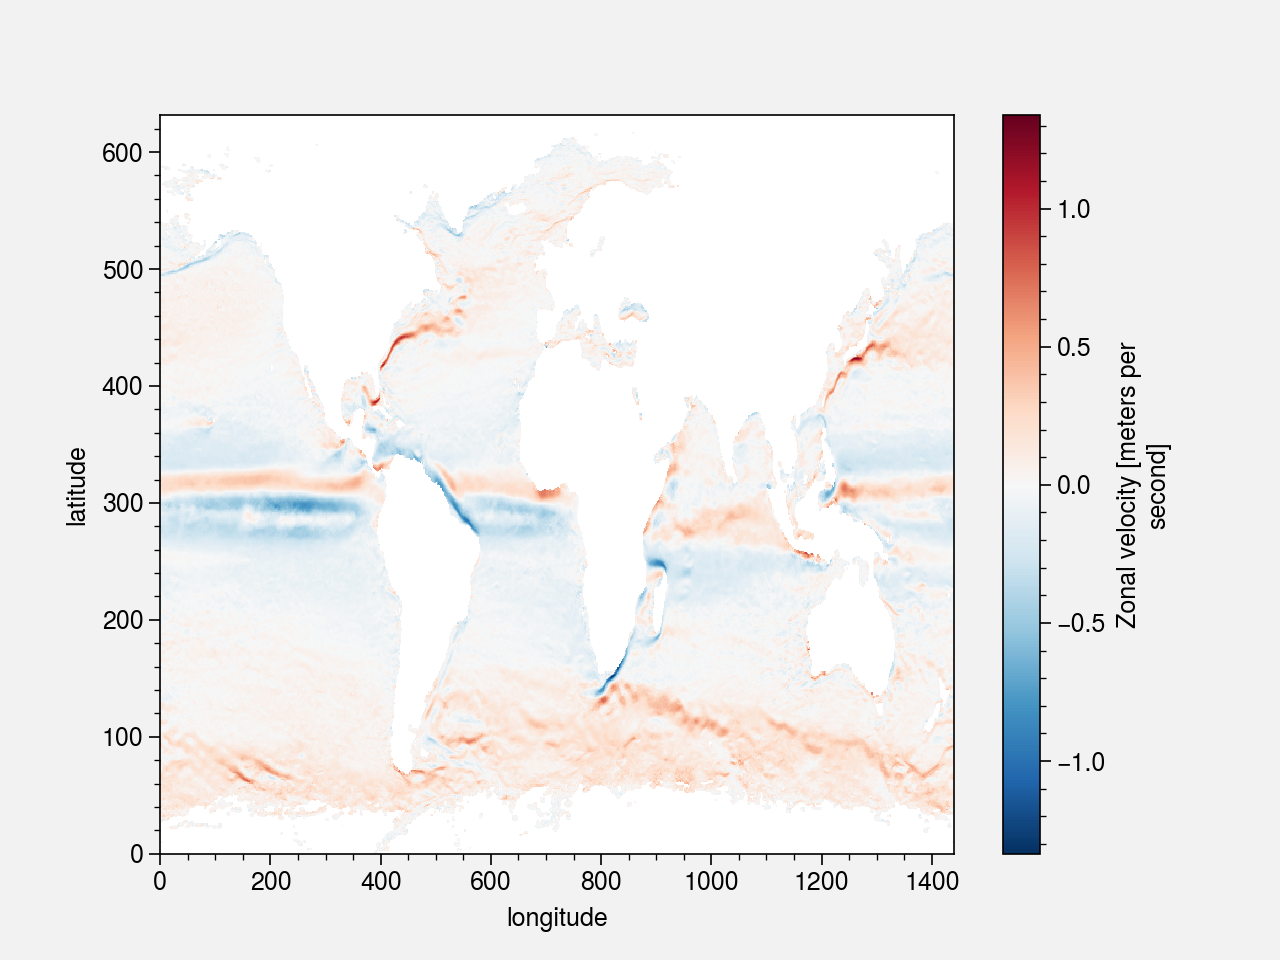

In [7]:
ds_obs = xr.open_dataset('/ihesp/user/dapengli/obs_dat/drifter_dat_2021Jun15/drifter_annualmeans.nc')
ds_obs.U.T.plot()
# ds_GMa_obs = ds_obs.sel(longitude=slice(420,600),latitude=slice(450,500)) # Ma: Maine
ds_GMe_obs = ds_obs.sel(longitude=slice(300,500),latitude=slice(350,450)) # Me: Mexico
ds_obs

# data analysis 

In [8]:
u1_NA_TH = ds1_vel_TH.UVEL.isel(nlon=slice(nlon1_NA_t12, nlon2_NA_t12), nlat=slice(nlat1_NA_t12, nlat2_NA_t12))
v1_NA_TH = ds1_vel_TH.VVEL.isel(nlon=slice(nlon1_NA_t12, nlon2_NA_t12), nlat=slice(nlat1_NA_t12, nlat2_NA_t12))
spd1_NA_TH = xr.ufuncs.sqrt(u1_NA_TH**2+ v1_NA_TH**2)
u2_NA_TH = ds2_vel_TH.UVEL.isel(nlon=slice(nlon1_NA_t12, nlon2_NA_t12), nlat=slice(nlat1_NA_t12, nlat2_NA_t12))
v2_NA_TH = ds2_vel_TH.VVEL.isel(nlon=slice(nlon1_NA_t12, nlon2_NA_t12), nlat=slice(nlat1_NA_t12, nlat2_NA_t12))
spd2_NA_TH = xr.ufuncs.sqrt(u2_NA_TH**2+ v2_NA_TH**2)

u1_NA_CH = ds1_vel_CH.UVEL.isel(nlon=slice(nlon1_NA_t12, nlon2_NA_t12), nlat=slice(nlat1_NA_t12, nlat2_NA_t12))
v1_NA_CH = ds1_vel_CH.VVEL.isel(nlon=slice(nlon1_NA_t12, nlon2_NA_t12), nlat=slice(nlat1_NA_t12, nlat2_NA_t12))
spd1_NA_CH = xr.ufuncs.sqrt(u1_NA_CH**2+ v1_NA_CH**2)
u2_NA_CH = ds2_vel_CH.UVEL.isel(nlon=slice(nlon1_NA_t12, nlon2_NA_t12), nlat=slice(nlat1_NA_t12, nlat2_NA_t12))
v2_NA_CH = ds2_vel_CH.VVEL.isel(nlon=slice(nlon1_NA_t12, nlon2_NA_t12), nlat=slice(nlat1_NA_t12, nlat2_NA_t12))
spd2_NA_CH = xr.ufuncs.sqrt(u2_NA_CH**2+ v2_NA_CH**2)

u1_NA_TL = ds1_vel_TL.UVEL.isel(nlon=slice(nlon1_NA_g16, nlon2_NA_g16), nlat=slice(nlat1_NA_g16, nlat2_NA_g16))
v1_NA_TL = ds1_vel_TL.VVEL.isel(nlon=slice(nlon1_NA_g16, nlon2_NA_g16), nlat=slice(nlat1_NA_g16, nlat2_NA_g16))
spd1_NA_TL = xr.ufuncs.sqrt(u1_NA_TL**2+ v1_NA_TL**2)
u2_NA_TL = ds2_vel_TL.UVEL.isel(nlon=slice(nlon1_NA_g16, nlon2_NA_g16), nlat=slice(nlat1_NA_g16, nlat2_NA_g16))
v2_NA_TL = ds2_vel_TL.VVEL.isel(nlon=slice(nlon1_NA_g16, nlon2_NA_g16), nlat=slice(nlat1_NA_g16, nlat2_NA_g16))
spd2_NA_TL = xr.ufuncs.sqrt(u2_NA_TL**2+ v2_NA_TL**2)

u1_NA_CL = ds1_vel_CL.UVEL.isel(nlon=slice(nlon1_NA_g16, nlon2_NA_g16), nlat=slice(nlat1_NA_g16, nlat2_NA_g16))
v1_NA_CL = ds1_vel_CL.VVEL.isel(nlon=slice(nlon1_NA_g16, nlon2_NA_g16), nlat=slice(nlat1_NA_g16, nlat2_NA_g16))
spd1_NA_CL = xr.ufuncs.sqrt(u1_NA_CL**2+ v1_NA_CL**2)
u2_NA_CL = ds2_vel_CL.UVEL.isel(nlon=slice(nlon1_NA_g16, nlon2_NA_g16), nlat=slice(nlat1_NA_g16, nlat2_NA_g16))
v2_NA_CL = ds2_vel_CL.VVEL.isel(nlon=slice(nlon1_NA_g16, nlon2_NA_g16), nlat=slice(nlat1_NA_g16, nlat2_NA_g16))
spd2_NA_CL = xr.ufuncs.sqrt(u2_NA_CL**2+ v2_NA_CL**2)

In [9]:
# ds0_TL.ANGLE.plot()
angle_NA_TL = ds0_TL.ANGLE.isel(nlon=slice(nlon1_NA_g16, nlon2_NA_g16), nlat=slice(nlat1_NA_g16, nlat2_NA_g16)) # [rad]
angle_NA_TH = ds0_TH.ANGLE.isel(nlon=slice(nlon1_NA_t12, nlon2_NA_t12), nlat=slice(nlat1_NA_t12, nlat2_NA_t12)) # [rad]

In [10]:
u1r_NA_TL = np.cos(angle_NA_TL)*u1_NA_TL - np.sin(angle_NA_TL)*v1_NA_TL 
v1r_NA_TL = np.sin(angle_NA_TL)*u1_NA_TL + np.cos(angle_NA_TL)*v1_NA_TL 

u2r_NA_TL = np.cos(angle_NA_TL)*u2_NA_TL - np.sin(angle_NA_TL)*v2_NA_TL 
v2r_NA_TL = np.sin(angle_NA_TL)*u2_NA_TL + np.cos(angle_NA_TL)*v2_NA_TL 

u1r_NA_TH = np.cos(angle_NA_TH)*u1_NA_TH - np.sin(angle_NA_TH)*v1_NA_TH 
v1r_NA_TH = np.sin(angle_NA_TH)*u1_NA_TH + np.cos(angle_NA_TH)*v1_NA_TH 

u2r_NA_TH = np.cos(angle_NA_TH)*u2_NA_TH - np.sin(angle_NA_TH)*v2_NA_TH 
v2r_NA_TH = np.sin(angle_NA_TH)*u2_NA_TH + np.cos(angle_NA_TH)*v2_NA_TH 

In [13]:
# du_THmCH = (ds2_vel_TH.UVEL-ds1_vel_TH.UVEL) - (ds2_vel_CH.UVEL - ds1_vel_CH.UVEL) 
# dv_THmCH = (ds2_vel_TH.VVEL-ds1_vel_TH.VVEL) - (ds2_vel_CH.VVEL - ds1_vel_CH.VVEL) 
# du_NA_THmCH = du_THmCH.isel(nlon=slice(nlon1_NA_t12, nlon2_NA_t12), nlat=slice(nlat1_NA_t12, nlat2_NA_t12)).compute()
# dv_NA_THmCH = dv_THmCH.isel(nlon=slice(nlon1_NA_t12, nlon2_NA_t12), nlat=slice(nlat1_NA_t12, nlat2_NA_t12)).compute()


# du_TLmCL = (ds2_vel_TL.UVEL-ds1_vel_TL.UVEL) - (ds2_vel_CL.UVEL - ds1_vel_CL.UVEL) 
# dv_TLmCL = (ds2_vel_TL.VVEL-ds1_vel_TL.VVEL) - (ds2_vel_CL.VVEL - ds1_vel_CL.VVEL) 
# du_NA_TLmCL = du_TLmCL.isel(nlon=slice(nlon1_NA_g16, nlon2_NA_g16), nlat=slice(nlat1_NA_g16, nlat2_NA_g16)).compute()
# dv_NA_TLmCL = dv_TLmCL.isel(nlon=slice(nlon1_NA_g16, nlon2_NA_g16), nlat=slice(nlat1_NA_g16, nlat2_NA_g16)).compute()

Gulf of Maine, historic: 2001-2020, future 2081-2100

In [14]:
# Ma: Gulf of maine, mask GS for Gulf of Maine circulation plot
u1_Ma_TL = u1r_NA_TL.where((ds_NA_g16.TLAT>40) & (ds_NA_g16.TLAT<53) & (ds_NA_g16.TLONG<-52+360),
                             np.nan).sel(z_t=5*100, method='nearest').sel(time=slice('2001','2020')).mean('time').compute()
v1_Ma_TL = v1r_NA_TL.where((ds_NA_g16.TLAT>40) & (ds_NA_g16.TLAT<53) & (ds_NA_g16.TLONG<-52+360),
                             np.nan).sel(z_t=5*100, method='nearest').sel(time=slice('2001','2020')).mean('time').compute()
spd1_Ma_TL = spd1_NA_TL.sel(z_t=5*100, method='nearest').sel(time=slice('2001','2020')).mean('time').compute()

u1_Ma_TH = u1r_NA_TH.where((ds_NA_t12.TLAT>40) & (ds_NA_t12.TLAT<53) & (ds_NA_t12.TLONG<-52+360),
                             np.nan).sel(z_t=5*100, method='nearest').sel(time=slice('2001','2020')).mean('time').compute()
v1_Ma_TH = v1r_NA_TH.where((ds_NA_t12.TLAT>40) & (ds_NA_t12.TLAT<53) & (ds_NA_t12.TLONG<-52+360),
                             np.nan).sel(z_t=5*100, method='nearest').sel(time=slice('2001','2020')).mean('time').compute()
spd1_Ma_TH = spd1_NA_TH.sel(z_t=5*100, method='nearest').sel(time=slice('2001','2020')).mean('time').compute()

u2_Ma_TL = u2r_NA_TL.where((ds_NA_g16.TLAT>40) & (ds_NA_g16.TLAT<53) & (ds_NA_g16.TLONG<-52+360),
                             np.nan).sel(z_t=5*100, method='nearest').mean('time').compute()
v2_Ma_TL = v2r_NA_TL.where((ds_NA_g16.TLAT>40) & (ds_NA_g16.TLAT<53) & (ds_NA_g16.TLONG<-52+360),
                             np.nan).sel(z_t=5*100, method='nearest').mean('time').compute()
spd2_Ma_TL = spd2_NA_TL.sel(z_t=5*100, method='nearest').mean('time').compute()

u2_Ma_TH = u2r_NA_TH.where((ds_NA_t12.TLAT>40) & (ds_NA_t12.TLAT<53) & (ds_NA_t12.TLONG<-52+360),
                             np.nan).sel(z_t=5*100, method='nearest').mean('time').compute()
v2_Ma_TH = v2r_NA_TH.where((ds_NA_t12.TLAT>40) & (ds_NA_t12.TLAT<53) & (ds_NA_t12.TLONG<-52+360),
                             np.nan).sel(z_t=5*100, method='nearest').mean('time').compute()
spd2_Ma_TH = spd2_NA_TH.sel(z_t=5*100, method='nearest').mean('time').compute()

# duMa_NA_THmCH = du_NA_THmCH.where((ds_NA_t12.TLAT>40) & (ds_NA_t12.TLAT<53) & (ds_NA_t12.TLONG<-52+360),np.nan)
# dvMa_NA_THmCH = dv_NA_THmCH.where((ds_NA_t12.TLAT>40) & (ds_NA_t12.TLAT<53) & (ds_NA_t12.TLONG<-52+360),np.nan)

In [15]:
u1_Ma_TL

<xarray.DataArray (nlat: 170, nlon: 60)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    ULONG    (nlat, nlon) float64 253.6 254.8 255.9 257.0 ... 318.5 319.2 320.0
    ULAT     (nlat, nlon) float64 3.729 3.728 3.728 3.727 ... 66.48 66.48 66.47
    z_t      float32 500.0
Dimensions without coordinates: nlat, nlon

Gulf of Mexico, time1: 1979-2020 (same with drifter), future (2081-2100) minus historic (2001-2020)

In [16]:
# Me: Gulf of Mexico
u1_Me_TL = u1r_NA_TL.sel(z_t=15*100, method='nearest').mean('time').compute()
v1_Me_TL = v1r_NA_TL.sel(z_t=15*100, method='nearest').mean('time').compute()
spd1_Me_TL = spd1_NA_TL.sel(z_t=15*100, method='nearest').mean('time').compute()


u1_Me_TH = u1r_NA_TH.sel(z_t=15*100, method='nearest').mean('time').compute()
v1_Me_TH = v1r_NA_TH.sel(z_t=15*100, method='nearest').mean('time').compute()
spd1_Me_TH = spd1_NA_TH.sel(z_t=15*100, method='nearest').mean('time').compute()

spd1_Me_CL = spd1_NA_CL.sel(z_t=15*100, method='nearest').mean('time').compute()
spd1_Me_CH = spd1_NA_CH.sel(z_t=15*100, method='nearest').mean('time').compute()

# u2Me_NA_TL = u2r_NA_TL.sel(z_t=15*100, method='nearest').mean('time').compute()
# v2Me_NA_TL = v2r_NA_TL.sel(z_t=15*100, method='nearest').mean('time').compute()
spd2_Me_TL = spd2_NA_TL.sel(z_t=15*100, method='nearest').mean('time').compute()
spd2_Me_CL = spd2_NA_CL.sel(z_t=15*100, method='nearest').mean('time').compute()

# u2Me_NA_TH = u2r_NA_TH.sel(z_t=15*100, method='nearest').mean('time').compute()
# v2Me_NA_TH = v2r_NA_TH.sel(z_t=15*100, method='nearest').mean('time').compute()
spd2_Me_TH = spd2_NA_TH.sel(z_t=15*100, method='nearest').mean('time').compute()
spd2_Me_CH = spd2_NA_CH.sel(z_t=15*100, method='nearest').mean('time').compute()


dspd_Me_THmCH = ((spd2_Me_TH - spd1_NA_TH.sel(z_t=15*100, method='nearest').sel(time=slice('2001','2020')).mean('time')) - 
                  (spd2_Me_CH - spd1_Me_CH)).compute()
dspd_Me_TLmCL = ((spd2_Me_TL - spd1_NA_TL.sel(z_t=15*100, method='nearest').sel(time=slice('2001','2020')).mean('time')) - 
                  (spd2_Me_CL - spd1_Me_CL)).compute()

In [31]:
duMe_TH = (u2_NA_TH.mean('time') - u1_NA_TH.sel(time=slice('2001','2020')).mean('time')).sel(z_t=15*100, method='nearest')
duMe_CH = (u2_NA_CH.mean('time') - u1_NA_CH.mean('time')).sel(z_t=15*100, method='nearest')
duMe_THmCH = duMe_TH - duMe_CH
duMe_THmCH

dvMe_TH = (v2_NA_TH.mean('time') - v1_NA_TH.sel(time=slice('2001','2020')).mean('time')).sel(z_t=15*100, method='nearest')
dvMe_CH = (v2_NA_CH.mean('time') - v1_NA_CH.mean('time')).sel(z_t=15*100, method='nearest')
dvMe_THmCH = dvMe_TH - dvMe_CH
dvMe_THmCH

duMe_TL = (u2_NA_TL.mean('time') - u1_NA_TL.sel(time=slice('2001','2020')).mean('time')).sel(z_t=15*100, method='nearest')
duMe_CL = (u2_NA_CL.mean('time') - u1_NA_CL.mean('time')).sel(z_t=15*100, method='nearest')
duMe_TLmCL = duMe_TL - duMe_CL
duMe_TLmCL

dvMe_TL = (v2_NA_TL.mean('time') - v1_NA_TL.sel(time=slice('2001','2020')).mean('time')).sel(z_t=15*100, method='nearest')
dvMe_CL = (v2_NA_CL.mean('time') - v1_NA_CL.mean('time')).sel(z_t=15*100, method='nearest')
dvMe_TLmCL = dvMe_TL - dvMe_CL
dvMe_TLmCL

durMe_THmCH = (np.cos(angle_NA_TH)*duMe_THmCH - np.sin(angle_NA_TH)*dvMe_THmCH).compute()
dvrMe_THmCH = (np.sin(angle_NA_TH)*duMe_THmCH + np.cos(angle_NA_TH)*dvMe_THmCH).compute()
durMe_TLmCL = (np.cos(angle_NA_TL)*duMe_TLmCL - np.sin(angle_NA_TL)*dvMe_TLmCL).compute()
dvrMe_TLmCL = (np.sin(angle_NA_TL)*duMe_TLmCL + np.cos(angle_NA_TL)*dvMe_TLmCL).compute()
dvrMe_TLmCL

In [17]:
u1_Me_TL

<xarray.DataArray (nlat: 170, nlon: 60)>
array([[-4.99685763, -3.32508536, -1.59646643, ..., 11.73765778,
         7.77244229,  5.2069172 ],
       [ 0.44862896,  1.86853157,  3.41770162, ..., 10.87846226,
         6.97393418,  4.83948931],
       [ 5.03146839,  6.2217916 ,  7.54179946, ...,  9.72569274,
         6.11260356,  4.57537746],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
    ULONG    (nlat, nlon) float64 253.6 254.8 255.9 257.0 ... 318.5 319.2 320.0
    ULAT     (nlat, nlon) float64 3.729 3.728 3.728 3.727 ... 66.48 66.48 66.47
    TLONG    (nlat, nlon) float64 253.1 254.2 255.3 256.4 ... 318.1 318.8 319.6
    TLAT     (nlat, nlon) float64 3.596 3.596 3.595 3.595 ... 66.29 66.28 66.28
    z_t      float32 1.5e+03
Dimensions without coordinates: nlat, nlon

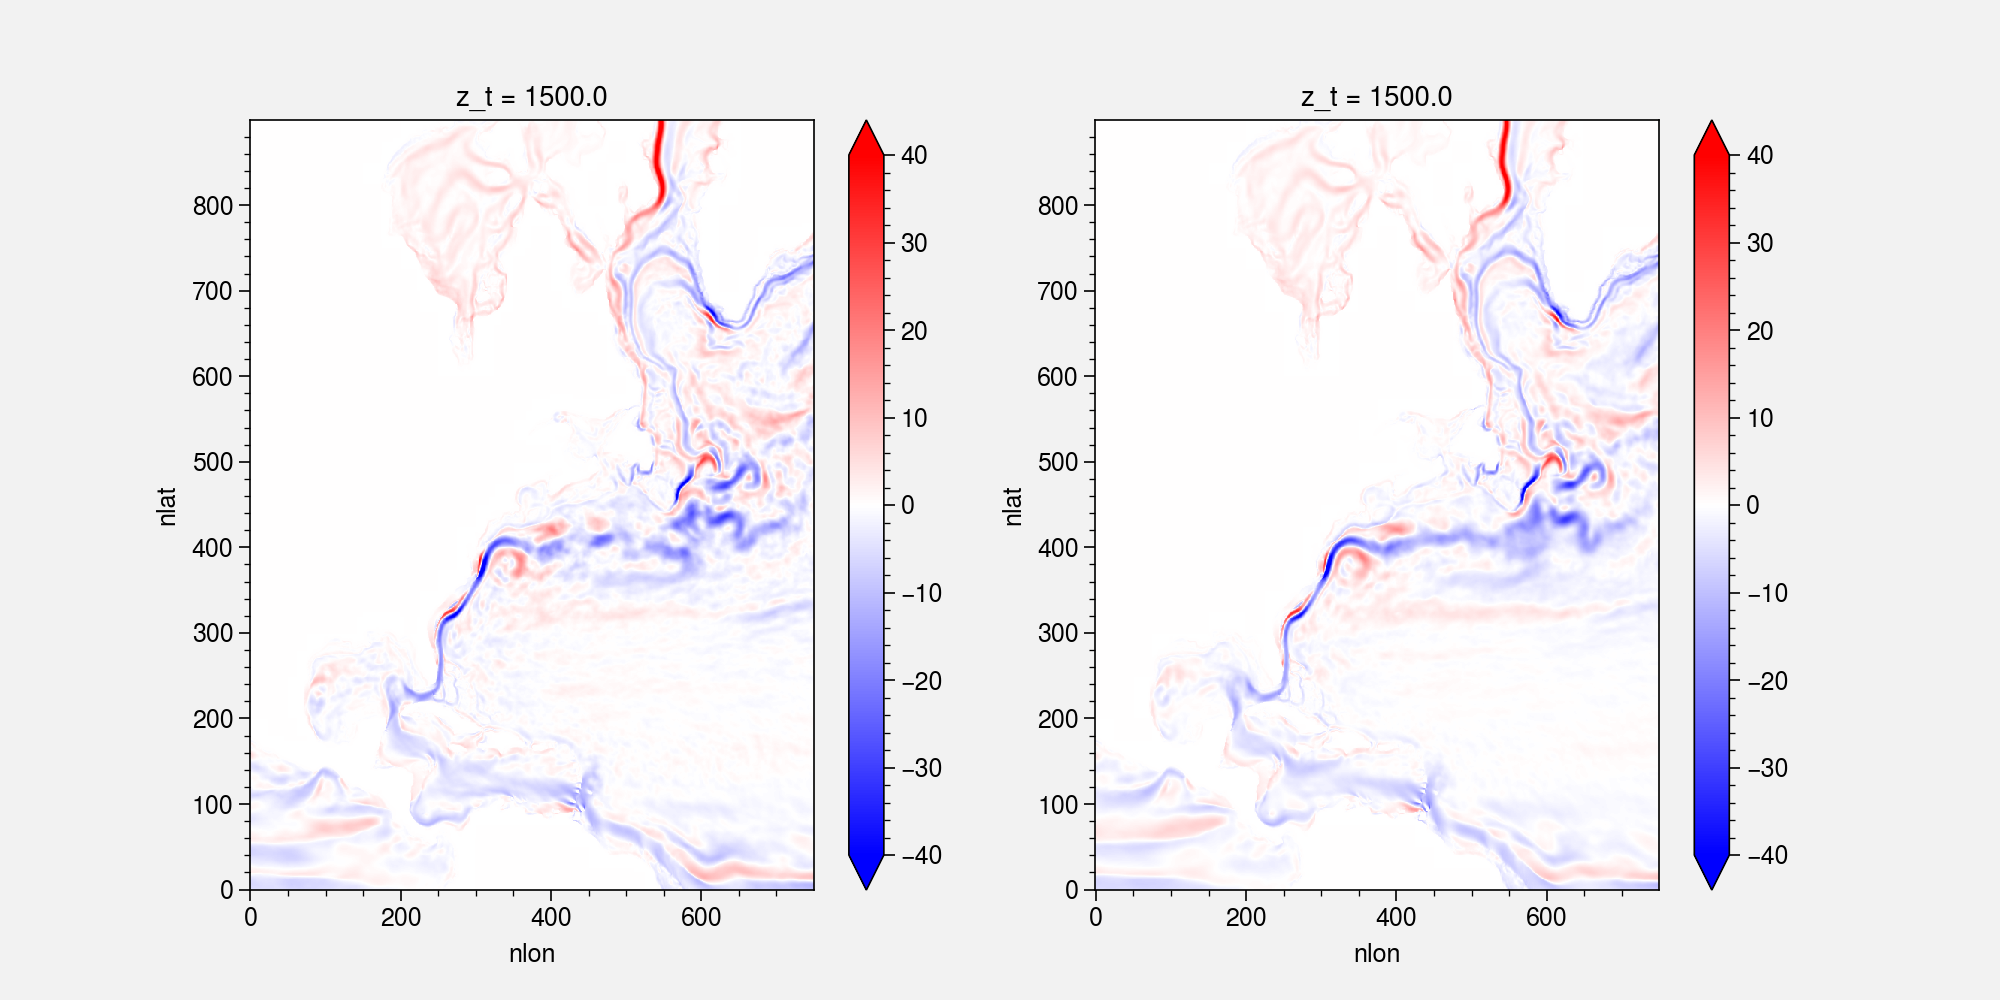

In [18]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
dspd_Me_THmCH.plot(ax=axs[0],vmin=-40,vmax=40,cmap='bwr')
(spd2_Me_TH-spd1_Me_TH).plot(ax=axs[1],vmin=-40,vmax=40,cmap='bwr')
# (spd2Me_NA_CH-spd1Me_NA_CH).plot()
# spd2Me_NA_CH

# make pics

Gulf of Maine

In [ ]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig1, axs = plot.subplots(nrows=2,ncols=2,proj='cyl',width='8in',height='6in')

# m00=axs[0,0].contourf(ds_obs.Lon, ds_obs.Lat, 
#         xr.ufuncs.sqrt(ds_obs.U.T**2+ ds_obs.U.T**2)*100, levels=np.arange(0,40+1,10), transform=pc, 
#         vmin=-25, vmax=25, cmap="Reds", extend='max')
# q00 = axs[0,0].quiver(ds_GMa_obs.Lon[::2], ds_GMa_obs.Lat[::2], 
#                       ds_GMa_obs.U.T[::2,::2]*100, ds_GMa_obs.V.T[::2,::2]*100, transform=pc, 
#                       scale=100, scale_units='inches')
# axs[0,0].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
# axs[0,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# # Boston (71.1W, 42.4N)
# # axs[1,1].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# # Cape Hatters (75.5W, 35.2N)
# axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
# axs[0,0].format(land=True, landcolor='grey')
# axs[0,0].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
# axs[0,0].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,5), crs=pc)
# axs[0,0].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,5), fontsize=12)
# axs[0,0].xaxis.set_major_formatter(lon_formatter)
# axs[0,0].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 5), crs=pc)
# axs[0,0].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 5), fontsize=12)
# axs[0,0].yaxis.set_major_formatter(lat_formatter)
# axs[0,0].set_title('SSH(2081-2100) - SSH(2001-2020) (HR)', fontsize=12, fontweight='bold')


m00=axs[0,0].pcolormesh(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        spd1_Ma_TL, levels=np.arange(0,50+1,10), transform=pc, 
        cmap="Reds", extend='max')
q00 = axs[0,0].quiver(ds_NA_g16.TLONG, ds_NA_g16.TLAT, u1_Ma_TL, v1_Ma_TL, 
                      transform=pc, scale=100, scale_units='inches')
axs[0,0].quiverkey(q00, X=0.1, Y=0.8, U=10,
             label='10 [cm/s]', labelpos='E')
axs[0,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
axs[0,0].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
axs[0,0].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,5), crs=pc)
axs[0,0].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,5), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 5), crs=pc)
axs[0,0].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 5), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title('$|V_{5m}|$ (2001-2020) (LR)', fontsize=12, fontweight='bold')
axs[0,0].text(-74, 53, 'a', transform=pc, fontsize=10)
# cb = axs[1,0].colorbar(m10,loc='r',label='[cm]',width='2em',shrink=1)

m01=axs[0,1].pcolormesh(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        spd2_Ma_TL, levels=np.arange(0,50+1,10), transform=pc, 
        cmap="Reds", extend='max')
# q10 = axs[1,0].quiver(ds_NA_g16.TLONG[::2,::2], ds_NA_g16.TLAT[::2,::2], 
#                       (u2m_NA_TL-u1m_NA_TL)[::2,::2], (v2m_NA_TL-v1m_NA_TL)[::2,::2], transform=pc, 
#                       scale=100, scale_units='inches')
q01 = axs[0,1].quiver(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
                      u2_Ma_TL, v2_Ma_TL, transform=pc, 
                      scale=100, scale_units='inches')
axs[0,1].quiverkey(q01, X=0.1, Y=0.8, U=10,
             label='10 [cm/s]', labelpos='E')
# axs[0,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
axs[0,1].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
axs[0,1].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,5), crs=pc)
axs[0,1].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,5), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 5), crs=pc)
axs[0,1].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 5), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title('$|V_{5m}|$ (2081-2100) (LR)', fontsize=12, fontweight='bold')
axs[0,1].text(-74, 53, 'b', transform=pc, fontsize=10)
cb = axs[0,1].colorbar(m01,loc='r',label='[cm]',width='2em',shrink=1)

m10=axs[1,0].pcolormesh(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
        spd1_Ma_TH, levels=np.arange(0,50+1,10), transform=pc, 
        cmap="Reds", extend='max')
q10 = axs[1,0].quiver(ds_NA_t12.TLONG[::5,::5], ds_NA_t12.TLAT[::5,::5], 
                u1_Ma_TH[::5,::5], v1_Ma_TH[::5, ::5], transform=pc, scale=100,scale_units='inches')
axs[1,0].quiverkey(q10, X=0.1, Y=0.8, U=10,
             label='10 [cm/s]', labelpos='E')
# axs[1,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].format(land=True, landcolor='grey')
axs[1,0].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
axs[1,0].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,5), crs=pc)
axs[1,0].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,5), fontsize=12)
axs[1,0].xaxis.set_major_formatter(lon_formatter)
axs[1,0].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 5), crs=pc)
axs[1,0].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 5), fontsize=12)
axs[1,0].yaxis.set_major_formatter(lat_formatter)
axs[1,0].set_title('$|V_{5m}|$ (2001-2020) (HR)', fontsize=12, fontweight='bold')
axs[1,0].text(-74, 53, 'c', transform=pc, fontsize=10)
# cb = axs[1,0].colorbar(m10,loc='r',label='[cm/s]',width='2em',shrink=1)

m11=axs[1,1].pcolormesh(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
        spd2_Ma_TH, levels=np.arange(0,50+1,10), transform=pc, 
        cmap="Reds", extend='max')
q11 = axs[1,1].quiver(ds_NA_t12.TLONG[::5,::5], ds_NA_t12.TLAT[::5,::5], 
                u2_Ma_TH[::5,::5], v2_Ma_TH[::5, ::5], transform=pc, scale=100,scale_units='inches')
# q11 = axs[1,1].quiver(ds_NA_t12.TLONG[::4,::4], ds_NA_t12.TLAT[::4,::4], 
#                 duMa_NA_THmCH[::4,::4], dvMa_NA_THmCH[::4, ::4], transform=pc, scale=50, scale_units='inches')
axs[1,1].quiverkey(q11, X=0.1, Y=0.8, U=10,
             label='10 [cm/s]', labelpos='E')
# axs[1,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].format(land=True, landcolor='grey')
axs[1,1].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
axs[1,1].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,5), crs=pc)
axs[1,1].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,5), fontsize=12)
axs[1,1].xaxis.set_major_formatter(lon_formatter)
axs[1,1].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 5), crs=pc)
axs[1,1].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 5), fontsize=12)
axs[1,1].yaxis.set_major_formatter(lat_formatter)
axs[1,1].set_title('$|V_{5m}|$ (2081-2100) (HR)', fontsize=12, fontweight='bold')
axs[1,1].text(-74, 53, 'd', transform=pc, fontsize=10)
cb = axs[1,1].colorbar(m11,loc='r',label='[cm]',width='2em',shrink=1)

# fig1.savefig(pic1, bbox_inches='tight')

Gulf of Mexico

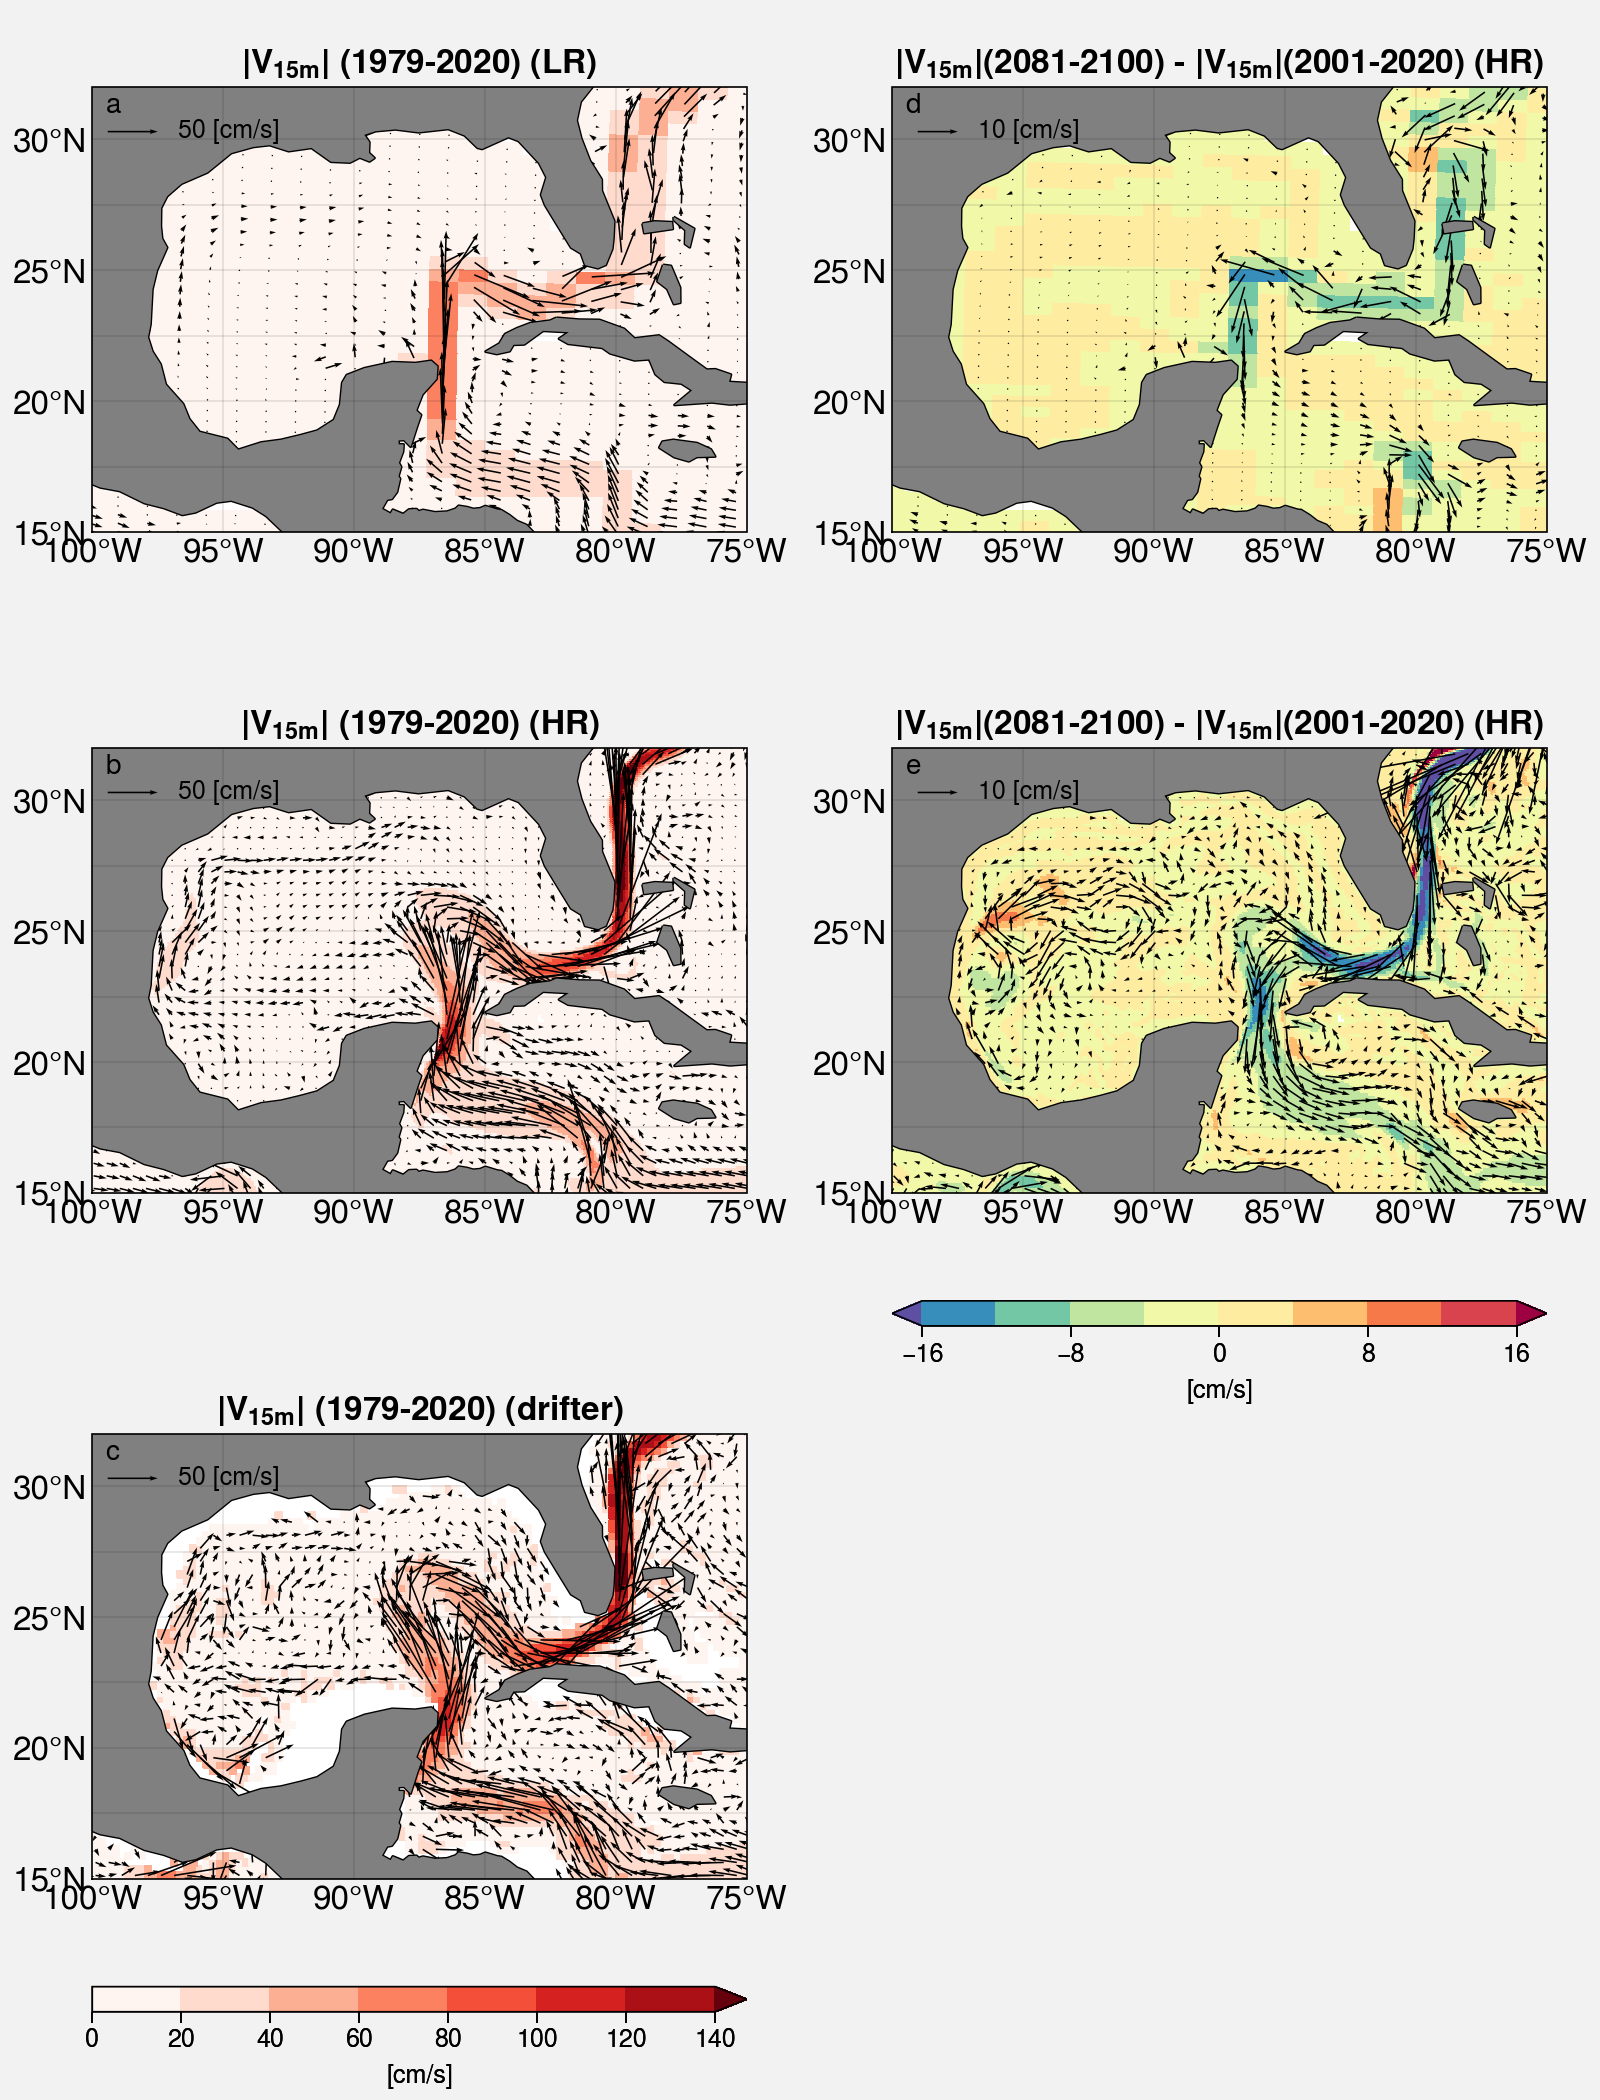

In [44]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig2, axs = plot.subplots(nrows=3,ncols=2,proj='cyl',width='8in',height='10.5in')

m00=axs[0,0].pcolormesh(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        spd1_Me_TL, levels=np.arange(0,140+1,20), transform=pc, 
        cmap="Reds", extend='max')
q00 = axs[0,0].quiver(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
                      u1_Me_TL, v1_Me_TL,
                      transform=pc, scale=200, scale_units='inches')
axs[0,0].quiverkey(q00, X=0.1, Y=0.9, U=50,
             label='50 [cm/s]', labelpos='E')
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
axs[0,0].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[0,0].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[0,0].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[0,0].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title('$|V_{15m}|$ (1979-2020) (LR)', fontsize=12, fontweight='bold')
axs[0,0].text(-99.5, 31, 'a', transform=pc, fontsize=10)
# cb = axs[1,0].colorbar(m10,loc='r',label='[cm]',width='2em',shrink=1)

cut=-0.
m01=axs[0,1].pcolormesh(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        dspd_Me_TLmCL, 
        levels=np.arange(-16,16+1,4), transform=pc, 
        cmap="spectral_r", cmap_kw={'cut': cut}, extend='both')
q01 = axs[0,1].quiver(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
                      durMe_TLmCL, dvrMe_TLmCL, transform=pc, 
                      scale=50, scale_units='inches')
axs[0,1].quiverkey(q01, X=0.1, Y=0.9, U=10,
             label='10 [cm/s]', labelpos='E')
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
axs[0,1].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[0,1].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[0,1].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[0,1].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title('$|V_{15m}|$(2081-2100) - $|V_{15m}|$(2001-2020) (HR)', fontsize=12, fontweight='bold')
axs[0,1].text(-99.5, 31, 'd', transform=pc, fontsize=10)
# axs[0,0].text(-98, 55, 'a', transform=pc, fontsize=12, fontweight='bold')

m10=axs[1,0].pcolormesh(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
        spd1_Me_TH, levels=np.arange(0,140+1,20), transform=pc, 
        cmap="Reds", extend='max')
q10 = axs[1,0].quiver(ds_NA_t12.TLONG[::5,::5], ds_NA_t12.TLAT[::5,::5], 
                u1_Me_TH[::5,::5], v1_Me_TH[::5, ::5], transform=pc, scale=200,scale_units='inches')
axs[1,0].quiverkey(q10, X=0.1, Y=0.9, U=50, label='50 [cm/s]', labelpos='E')
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].format(land=True, landcolor='grey')
axs[1,0].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[1,0].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[1,0].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[1,0].xaxis.set_major_formatter(lon_formatter)
axs[1,0].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[1,0].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[1,0].yaxis.set_major_formatter(lat_formatter)
axs[1,0].set_title('$|V_{15m}|$ (1979-2020) (HR)', fontsize=12, fontweight='bold')
axs[1,0].text(-99.5, 31, 'b', transform=pc, fontsize=10)
# cb = axs[1,0].colorbar(m01,loc='r',label='[cm]',width='2em',shrink=1)

m11=axs[1,1].pcolormesh(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
        dspd_Me_THmCH, 
        levels=np.arange(-16,16+1,4), transform=pc, 
        cmap="spectral_r",cmap_kw={'cut': cut}, extend='both')
q11 = axs[1,1].quiver(ds_NA_t12.TLONG[::5,::5], ds_NA_t12.TLAT[::5,::5], 
                durMe_THmCH[::5,::5], dvrMe_THmCH[::5, ::5], transform=pc, scale=50, scale_units='inches')
axs[1,1].quiverkey(q11, X=0.1, Y=0.9, U=10,
             label='10 [cm/s]', labelpos='E')
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].format(land=True, landcolor='grey')
axs[1,1].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[1,1].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[1,1].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[1,1].xaxis.set_major_formatter(lon_formatter)
axs[1,1].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[1,1].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[1,1].yaxis.set_major_formatter(lat_formatter)
axs[1,1].set_title('$|V_{15m}|$(2081-2100) - $|V_{15m}|$(2001-2020) (HR)', fontsize=12, fontweight='bold')
axs[1,1].text(-99.5, 31, 'e', transform=pc, fontsize=10)
cb = axs[1,1].colorbar(m11,loc='b',label='[cm/s]',width='1em',shrink=1)

m20=axs[2,0].pcolormesh(ds_GMe_obs.Lon, ds_GMe_obs.Lat, 
        xr.ufuncs.sqrt(ds_GMe_obs.U.T**2+ ds_GMe_obs.V.T**2)*100, levels=np.arange(0,140+1,20), transform=pc, 
        cmap="Reds", extend='max')
q20 = axs[2,0].quiver(ds_GMe_obs.Lon[::2], ds_GMe_obs.Lat[::2], 
                      ds_GMe_obs.U.T[::2,::2]*100, ds_GMe_obs.V.T[::2,::2]*100, transform=pc, 
                      scale=200, scale_units='inches')
axs[2,0].quiverkey(q20, X=0.1, Y=0.9, U=50,
             label='50 [cm/s]', labelpos='E')
axs[2,0].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[2,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,0].format(land=True, landcolor='grey')
axs[2,0].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[2,0].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[2,0].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[2,0].xaxis.set_major_formatter(lon_formatter)
axs[2,0].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[2,0].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[2,0].yaxis.set_major_formatter(lat_formatter)
axs[2,0].set_title('$|V_{15m}|$ (1979-2020) (drifter)', fontsize=12, fontweight='bold')
axs[2,0].text(-99.5, 31, 'c', transform=pc, fontsize=10)
cb = axs[2,0].colorbar(m20,loc='b',label='[cm/s]',width='1em',shrink=1)

axs[2,1].format(grid=False)
axs[2,1].axis('off')

fig2.savefig(pic2, bbox_inches='tight')